In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [51]:
data = pd.read_csv('shootings.csv')

# Data

In [71]:
data.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category,year
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns,2015
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns,2015
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed,2015
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects,2015
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects,2015


In [53]:
data.dtypes, data.isnull().sum()

(id                           int64
 name                        object
 date                        object
 manner_of_death             object
 armed                       object
 age                        float64
 gender                      object
 race                        object
 city                        object
 state                       object
 signs_of_mental_illness       bool
 threat_level                object
 flee                        object
 body_camera                   bool
 arms_category               object
 dtype: object,
 id                         0
 name                       0
 date                       0
 manner_of_death            0
 armed                      0
 age                        0
 gender                     0
 race                       0
 city                       0
 state                      0
 signs_of_mental_illness    0
 threat_level               0
 flee                       0
 body_camera                0
 arms_category          

# Univariate Analysis

Text(0.5, 0, 'Race')

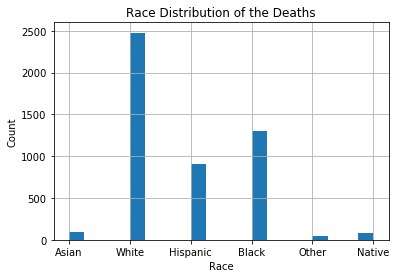

In [54]:
data['race'].hist(bins=20)
plt.title('Race Distribution of the Deaths')
plt.ylabel('Count')
plt.xlabel('Race')

Text(0.5, 0, 'Age')

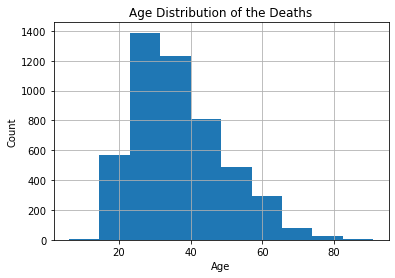

In [55]:
data['age'].hist()
plt.title('Age Distribution of the Deaths')
plt.ylabel('Count')
plt.xlabel('Age')

Text(0.5, 0, 'Gender')

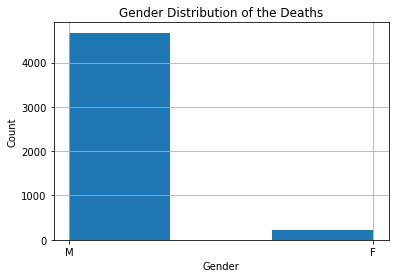

In [56]:
data['gender'].hist(bins=3)
plt.title('Gender Distribution of the Deaths')
plt.ylabel('Count')
plt.xlabel('Gender')

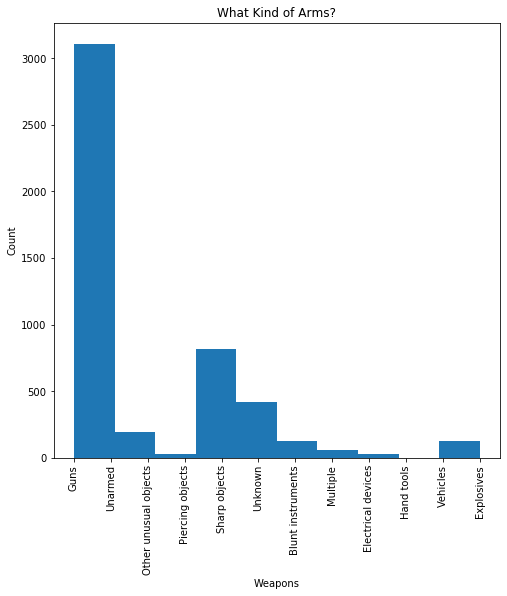

In [144]:
data['arms_category'].hist(bins=10)
plt.xticks(rotation=90)
plt.title('What Kind of Arms?')
plt.ylabel('Count')
plt.xlabel('Weapons')
plt.grid(b=None)
plt.show()

# Bivariate Analysis

In [57]:
# What is the distribution of both gender and race?

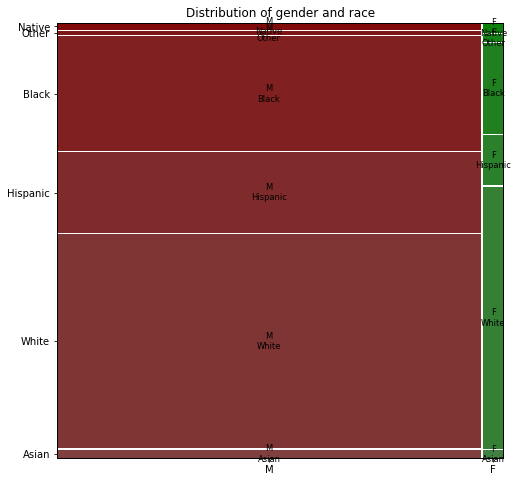

In [131]:
from statsmodels.graphics.mosaicplot import mosaic
mosaic(data, ['gender', 'race'],)
plt.title('Distribution of gender and race')
plt.show()

In [59]:
# Compare yearly deaths.

In [63]:
year = []
for date in data['date']:
    year.append(int(date[:4])) # Append year, such as 2015, 2016..

In [64]:
data['year'] = year

Text(0.5, 0, 'Year')

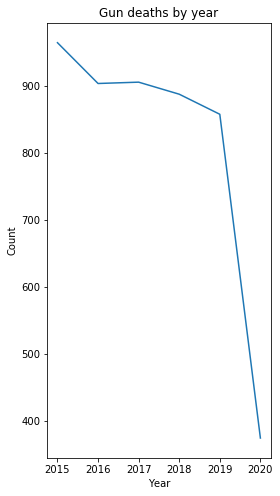

In [72]:
data.groupby('year').count()['id'].plot.line()
plt.title('Gun deaths by year')
plt.ylabel('Count')
plt.xlabel('Year')
# Note that our 2020 data only contains date until June. So the result below may not accurate reflect the truth.

In [81]:
# Relationship between unarmed and race

Text(0, 0.5, 'count')

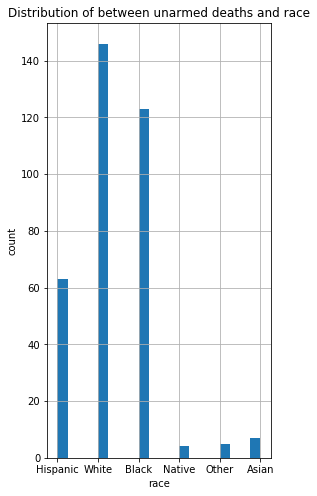

In [91]:
unarmed = data[data['armed'] == 'unarmed']
unarmed['race'].hist(bins= 20)
plt.title('Distribution of between unarmed deaths and race')
plt.xlabel('race')
plt.ylabel('count')

In [89]:
# Unarmed and not-flee

Text(0, 0.5, 'count')

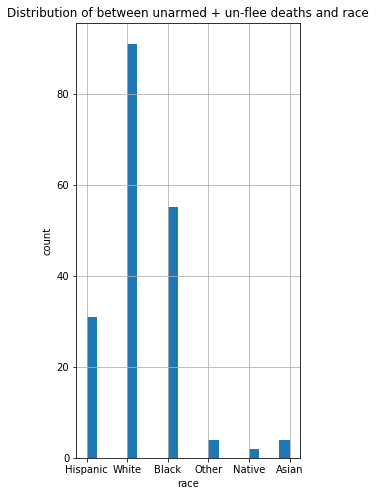

In [92]:
unarmed_unflee = unarmed[unarmed['flee']== 'Not fleeing']
unarmed_unflee['race'].hist(bins=20)
plt.title('Distribution of between unarmed + un-flee deaths and race')
plt.xlabel('race')
plt.ylabel('count')

In [97]:
# Deaths and States

In [105]:
data.groupby('state').count()['id'].head()

state
AK     36
AL     95
AR     73
AZ    222
CA    701
Name: id, dtype: int64

In [127]:
# Body camera on vs. race

In [126]:
race_cam_off = data[data['body_camera']==False].groupby('race').count()['id']
race_cam_on = data[data['body_camera']==True].groupby('race').count()['id']
race_cam_on/(race_cam_on + race_cam_off)

race
Asian       0.172043
Black       0.157165
Hispanic    0.117517
Native      0.153846
Other       0.125000
White       0.094507
Name: id, dtype: float64

In [135]:
# Unarmed vs. race

In [134]:
race_unarmed = data[data['armed']=='unarmed'].groupby('race').count()['id']
race_armed = data[data['armed']!='unarmed'].groupby('race').count()['id']
race_unarmed/(race_armed+race_unarmed)

race
Asian       0.075269
Black       0.094761
Hispanic    0.069845
Native      0.051282
Other       0.104167
White       0.058966
Name: id, dtype: float64

02/03 when CDC declared emergency outbreak

In [148]:
after = data[data['date']  >= '2020-02-03']
before = data[data['date']  < '2020-02-03']